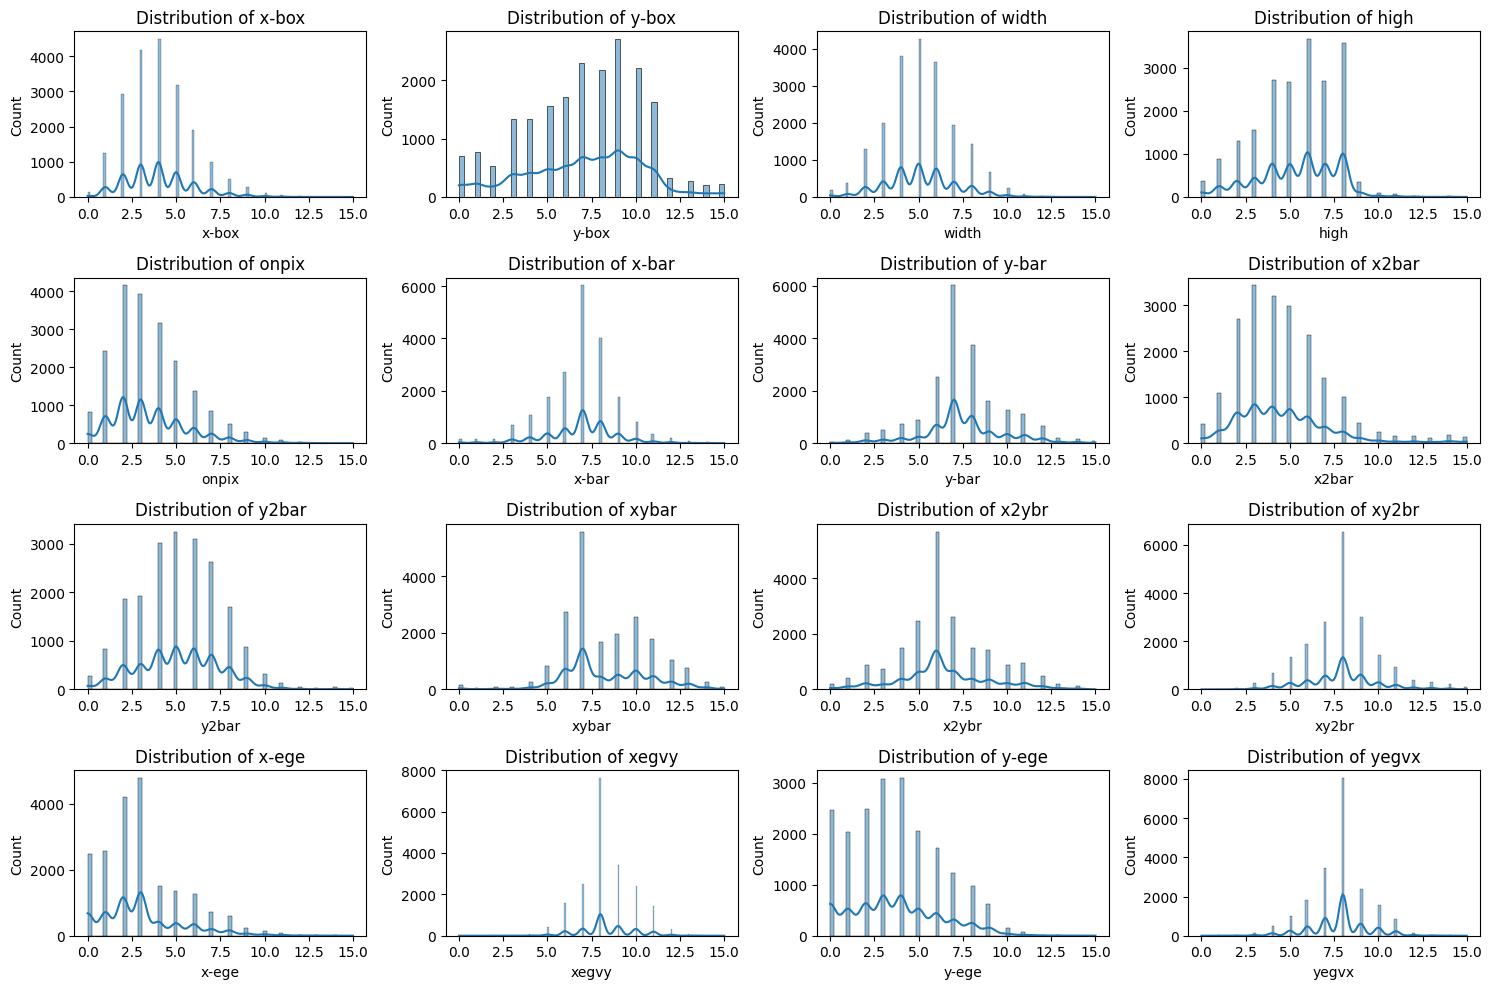

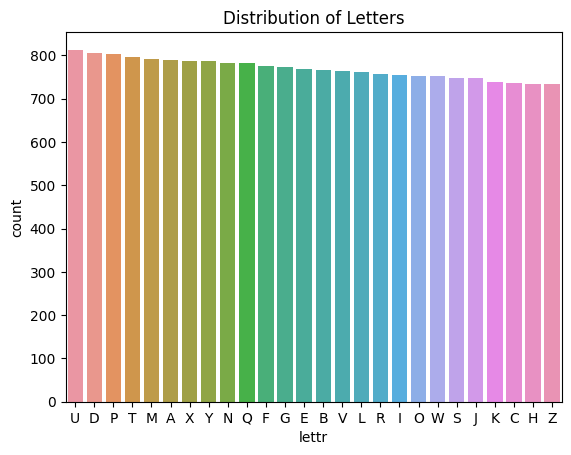

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'my_dataset.csv'
df = pd.read_csv(file_path)

# Basic statistics
descriptive_stats = df.describe()

# Count of missing values
missing_values = df.isnull().sum()

# Distribution plots for numerical attributes
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[1:], 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()

# Count plot for 'lettr' column
count_plot = sns.countplot(data=df, x='lettr', order=df['lettr'].value_counts().index)
plt.title('Distribution of Letters')
plt.show()


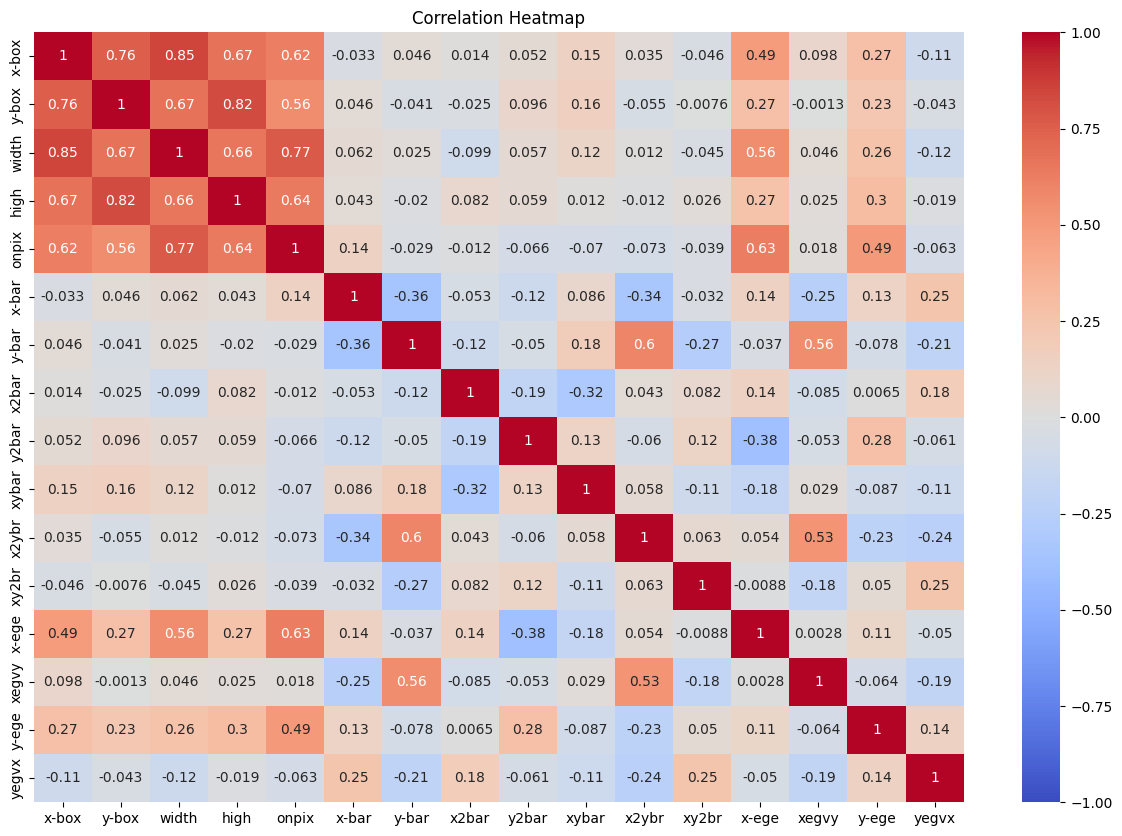

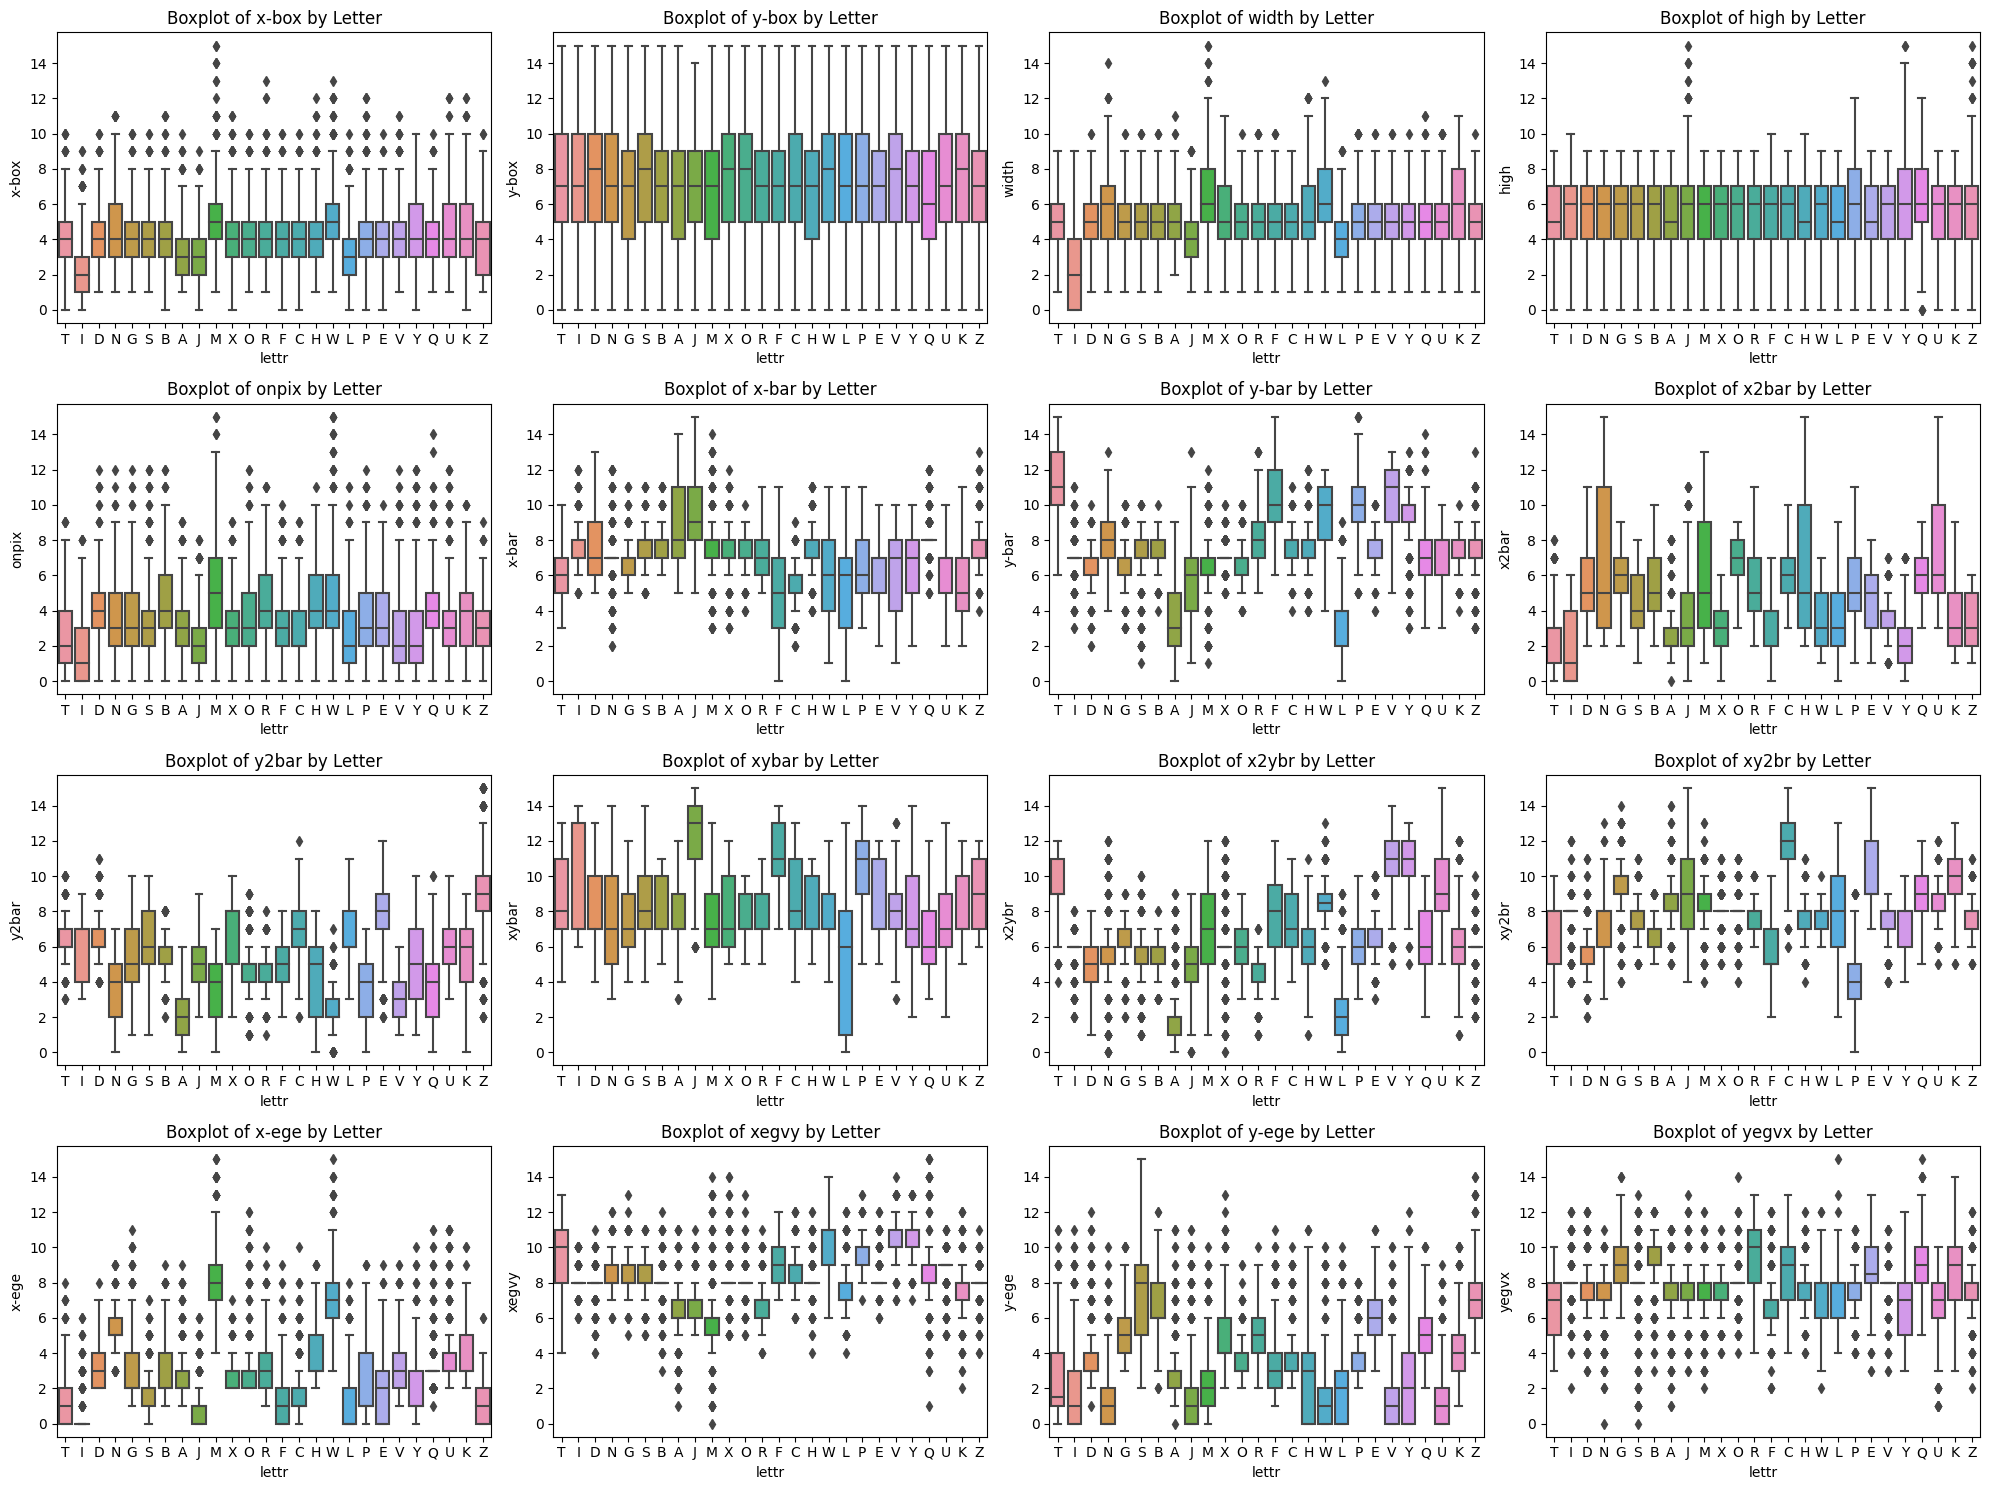

In [3]:
import numpy as np

# Correlation Analysis
correlation_matrix = df.iloc[:, 1:].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Boxplots for each numerical attribute against the 'lettr' column
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[1:], 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x='lettr', y=column)
    plt.title(f'Boxplot of {column} by Letter')
    plt.tight_layout()
plt.show()

# Observations based on correlation matrix
highly_correlated_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns if (correlation_matrix.loc[col1, col2] > 0.7 or correlation_matrix.loc[col1, col2] < -0.7) and col1 != col2]
unique_highly_correlated_pairs = list(np.unique(np.array(highly_correlated_pairs), axis=0))


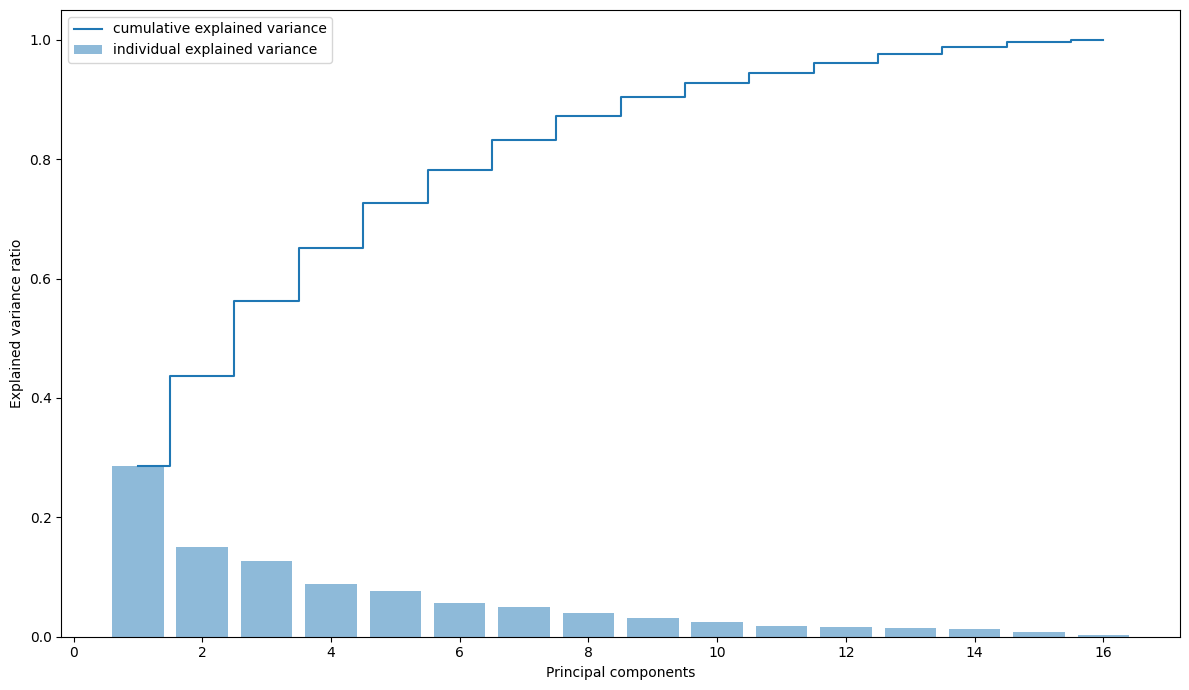

In [4]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Splitting the dataset into training and test sets
X = df.drop('lettr', axis=1)
y = df['lettr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Performing PCA without specifying the number of components
pca_full = PCA()
X_train_pca_full = pca_full.fit_transform(X_train)

# Visualizing the explained variance by each principal component
explained_variance_full = pca_full.explained_variance_ratio_
plt.figure(figsize=(12, 7))
plt.bar(range(1, len(explained_variance_full) + 1), explained_variance_full, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(explained_variance_full) + 1), np.cumsum(explained_variance_full), where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [5]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Splitting the dataset into training and test sets
X = df.drop('lettr', axis=1)
y = df['lettr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Performing PCA transformation with 10 components
pca_10 = PCA(n_components=10)
X_train_pca_10 = pca_10.fit_transform(X_train)
X_test_pca_10 = pca_10.transform(X_test)


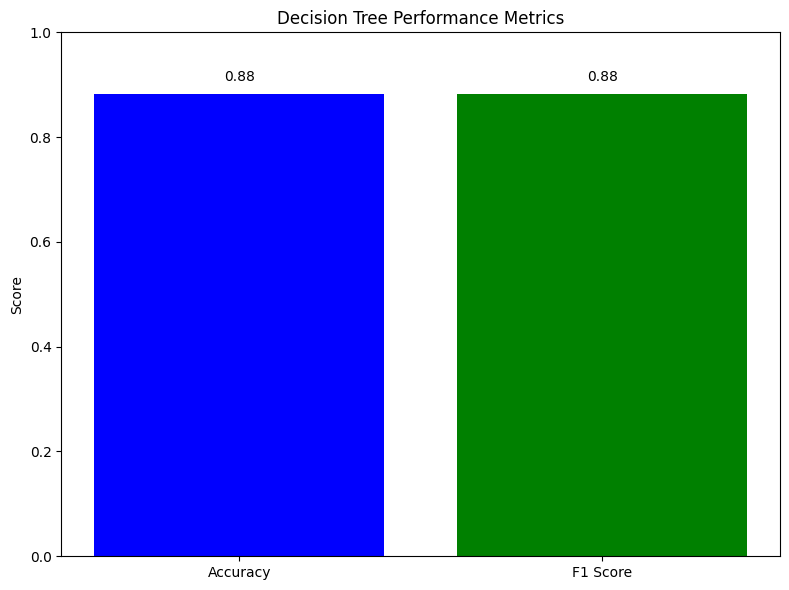

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Splitting the dataset into training and test sets
X = df.drop('lettr', axis=1)
y = df['lettr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Defining the hyperparameters for Random Search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Random Search with Cross-Validation
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Training the Decision Tree classifier with the best parameters
clf_best = DecisionTreeClassifier(**random_search.best_params_, random_state=42)
clf_best.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf_best.predict(X_test)

# Calculating Accuracy and F1 Score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Plotting Accuracy and F1 Score
labels = ['Accuracy', 'F1 Score']
values = [accuracy, f1]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Decision Tree Performance Metrics')
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()




Fitting 5 folds for each of 5 candidates, totalling 25 fits


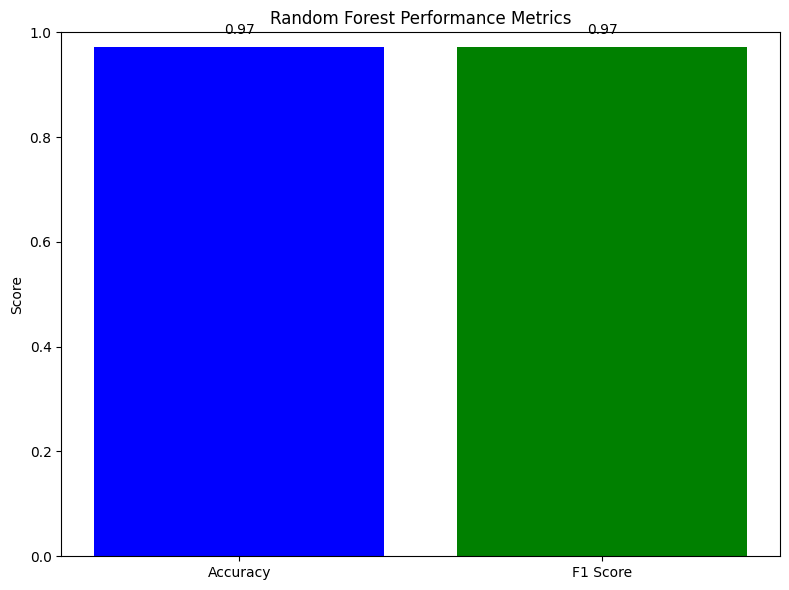

In [7]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=200, num=10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=5, cv=5, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)
y_pred = rf_random.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' is used if 'lettr' is multi-class. If binary, you can use 'binary'.

# Plotting Accuracy and F1 Score
labels = ['Accuracy', 'F1 Score']
values = [accuracy, f1]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Random Forest Performance Metrics')
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


In [8]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
def knn_random_search(X_train, y_train):
    # Number of neighbors to use
    n_neighbors = list(range(1,31))
    # Weight function used in prediction
    weights = ['uniform', 'distance']
    # Algorithm used to compute the nearest neighbors
    algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
    # Distance metric used for the tree
    p = [1, 2]

    # Create the random grid
    random_grid = {
        'n_neighbors': n_neighbors,
        'weights': weights,
        'algorithm': algorithm,
        'p': p
    }

    # Use the random grid to search for best hyperparameters
    knn = KNeighborsClassifier()
    knn_random = RandomizedSearchCV(estimator=knn, param_distributions=random_grid, n_iter=5, cv=5, verbose=2, random_state=42, n_jobs=-1)
    knn_random.fit(X_train, y_train)
    
    return knn_random.best_estimator_


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


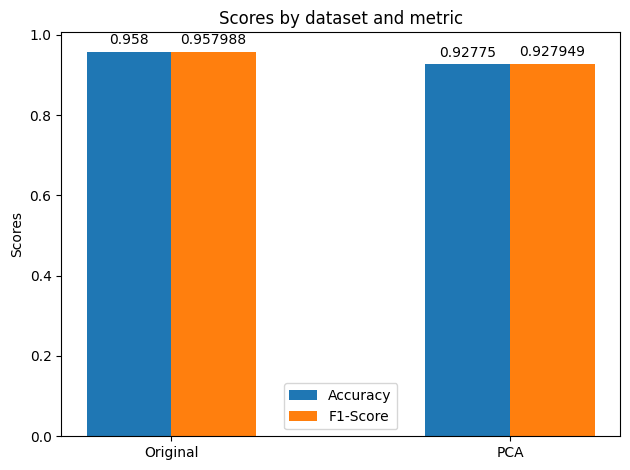

In [9]:
best_knn_original = knn_random_search(X_train, y_train)
y_pred_original = best_knn_original.predict(X_test)

accuracy_original = accuracy_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original, average='weighted')

best_knn_pca = knn_random_search(X_train_pca_10, y_train)
y_pred_pca = best_knn_pca.predict(X_test_pca_10)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca, average='weighted')

labels = ['Original', 'PCA']
accuracy_values = [accuracy_original, accuracy_pca]
f1_values = [f1_original, f1_pca]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_values, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_values, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by dataset and metric')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


In [10]:
from sklearn.svm import SVC
def svm_random_search(X_train, y_train, rbf):
    # C parameter
    C = [0.1, 1, 10, 100]
    # Kernel type
    kernel = []
    if(rbf == True):
        kernel.append('rbf')
    else:
        kernel.append('linear')
    # Degree of the polynomial kernel function
    degree = [2, 3, 4, 5]
    # Kernel coefficient
    gamma = ['scale', 'auto']
    
    # Create the random grid
    random_grid = {
        'C': C,
        'kernel': kernel,
        'degree': degree,
        'gamma': gamma
    }

    # Use the random grid to search for best hyperparameters
    svm = SVC()
    svm_random = RandomizedSearchCV(estimator=svm, param_distributions=random_grid, n_iter=5, cv=5, verbose=2, random_state=42, n_jobs=-1)
    svm_random.fit(X_train, y_train)
    
    return svm_random.best_estimator_


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


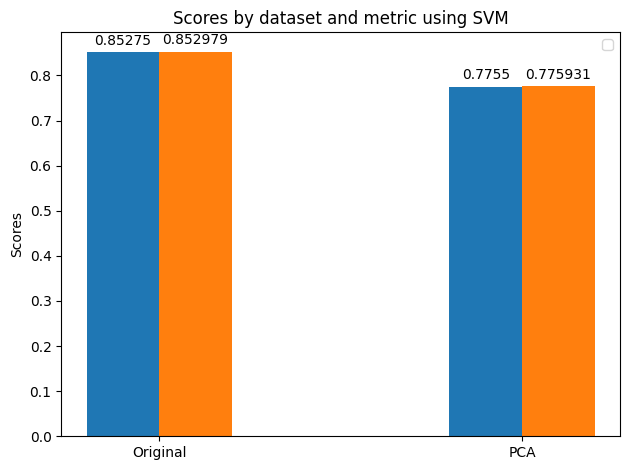

In [11]:
best_svm_original = svm_random_search(X_train, y_train, False)
y_pred_original = best_svm_original.predict(X_test)

accuracy_original = accuracy_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original, average='weighted')

best_svm_pca = svm_random_search(X_train_pca_10, y_train, False)
y_pred_pca = best_svm_pca.predict(X_test_pca_10)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca, average='weighted')
labels = ['Original', 'PCA']
accuracy_values = [accuracy_original, accuracy_pca]
f1_values = [f1_original, f1_pca]

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_values, width)
rects2 = ax.bar(x + width/2, f1_values, width)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by dataset and metric using SVM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


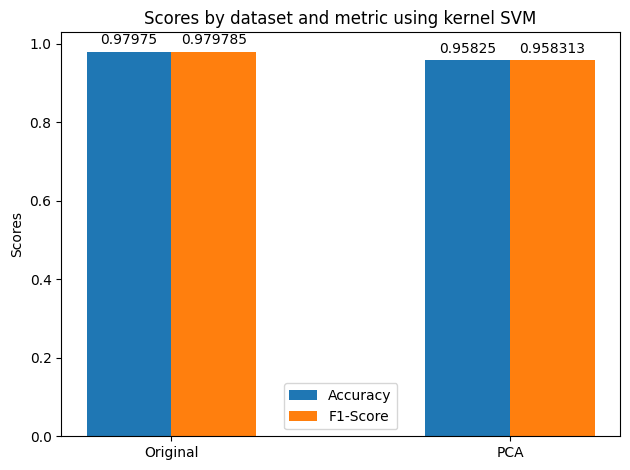

In [12]:
best_svm_original = svm_random_search(X_train, y_train, True)
y_pred_original = best_svm_original.predict(X_test)

accuracy_original = accuracy_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original, average='weighted')

best_svm_pca = svm_random_search(X_train_pca_10, y_train, True)
y_pred_pca = best_svm_pca.predict(X_test_pca_10)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca, average='weighted')
labels = ['Original', 'PCA']
accuracy_values = [accuracy_original, accuracy_pca]
f1_values = [f1_original, f1_pca]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_values, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_values, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by dataset and metric using kernel SVM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


In [13]:
from sklearn.linear_model import LogisticRegression
def logistic_random_search(X_train, y_train):
    # Regularization parameter
    C = np.logspace(-4, 4, 20)
    # Solver
    solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    # Penalty
    penalty = ['l1', 'l2', 'elasticnet', 'none']
    # L1 ratio for elasticnet
    l1_ratio = np.linspace(0, 1, 10)
    
    # Create the random grid
    random_grid = {
        'C': C,
        'solver': solver,
        'penalty': penalty,
        'l1_ratio': l1_ratio
    }

    # Use the random grid to search for best hyperparameters
    logreg = LogisticRegression(max_iter=10000)
    logreg_random = RandomizedSearchCV(estimator=logreg, param_distributions=random_grid, n_iter=5, cv=5, verbose=2, random_state=42, n_jobs=-1)
    logreg_random.fit(X_train, y_train)
    
    return logreg_random.best_estimator_


Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear

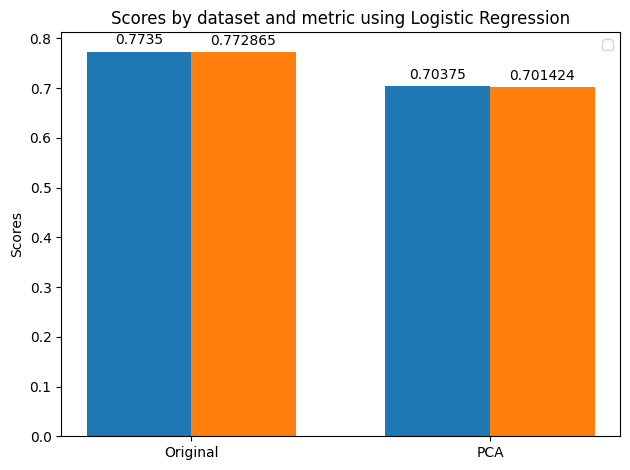

In [14]:
best_logreg_original = logistic_random_search(X_train, y_train)
y_pred_original = best_logreg_original.predict(X_test)

accuracy_original = accuracy_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original, average='weighted')

best_logreg_pca = logistic_random_search(X_train_pca_10, y_train)
y_pred_pca = best_logreg_pca.predict(X_test_pca_10)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca, average='weighted')

labels = ['Original', 'PCA']
accuracy_values = [accuracy_original, accuracy_pca]
f1_values = [f1_original, f1_pca]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_values, width)
rects2 = ax.bar(x + width/2, f1_values, width)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by dataset and metric using Logistic Regression')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score


# Convert string labels to integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y_train = encoder.transform(y_train)
encoded_Y_test = encoder.transform(y_test)

# Define the neural network model
def create_model(optimizer='adam', neurons=50, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(np.unique(y)), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier for use with scikit-learn
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=0, neurons= 50, dropout_rate = 0.5)

# Define the hyperparameters for Random Search
param_dist = {
    'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'],
    'neurons': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'dropout_rate': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'batch_size': [5, 10, 20, 40, 60, 80, 100],
    'epochs': [10, 20, 30, 40, 50]
}

# Random Search with Cross-Validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5, cv=3, n_jobs=-1, random_state=42)
random_search.fit(X_train, encoded_Y_train)

# Predicting on the test set
y_pred = random_search.predict(X_test)

# Calculating Accuracy and F1 Score
accuracy = accuracy_score(encoded_Y_test, y_pred)
f1 = f1_score(encoded_Y_test, y_pred, average='weighted')

# Plotting Accuracy and F1 Score
labels = ['Accuracy', 'F1 Score']
values = [accuracy, f1]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Neural Network Performance Metrics')
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future r